# ML Assignment 5

First i will show simple operations results on dataset and then i will perform assign task in this assignmnet 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.datasets import fetch_openml

df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

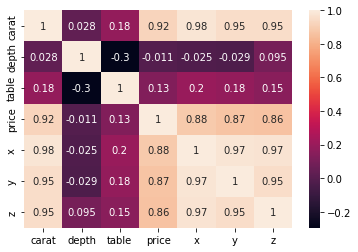

In [10]:
sns.heatmap(df.corr(),annot = True)

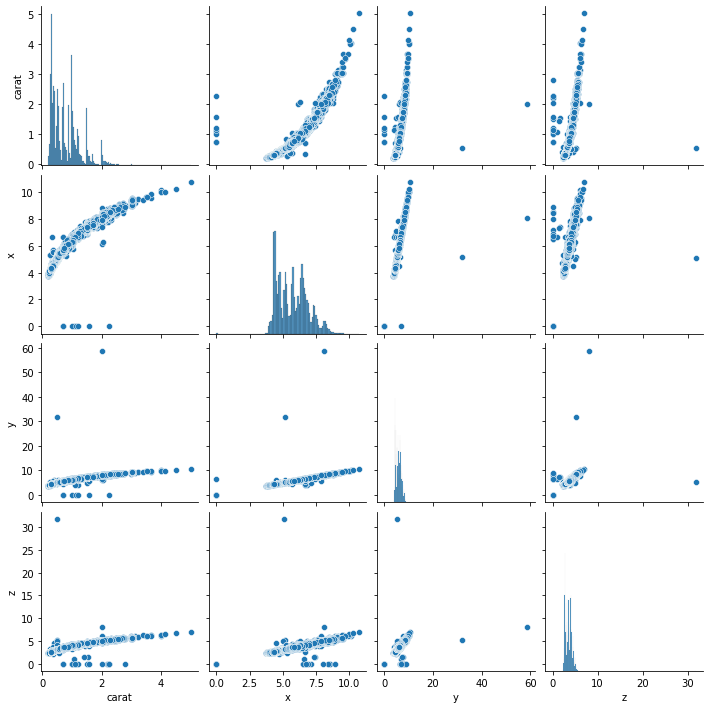

In [11]:
sns.pairplot(df[['carat','x','y','z']])

In [12]:
# BY just Selecting the important ones
X = df[['x','y','z']]
X_features = ['x','y','z']
Xarr = X.values.reshape((-1, 1))
y = df['carat']

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 3) (8091, 3) (45849,) (8091,)


In [16]:
sgdr = SGDRegressor(alpha = 0.001, verbose = 1)
sgdr.fit(xtrain, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")


-- Epoch 1
Norm: 0.31, NNZs: 3, Bias: -1.210362, T: 45849, Avg. loss: 0.018431
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 3, Bias: -1.437656, T: 91698, Avg. loss: 0.006660
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 3, Bias: -1.512570, T: 137547, Avg. loss: 0.005759
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.34, NNZs: 3, Bias: -1.542585, T: 183396, Avg. loss: 0.005614
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.35, NNZs: 3, Bias: -1.556091, T: 229245, Avg. loss: 0.005586
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.35, NNZs: 3, Bias: -1.559133, T: 275094, Avg. loss: 0.005565
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.35, NNZs: 3, Bias: -1.562171, T: 320943, Avg. loss: 0.005566
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
SGDRegressor(alpha=0.001, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0


In [17]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

model parameters:
 w: [ 0.31343055 -0.00239475  0.16520604], 
 b:[-1.56217106]


In [19]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(xtest)

# make a prediction using w,b. 
y_pred = np.dot(xtest, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on test set:\n{y_pred[:10].round(2)}" )
print(f"Target values \n{ytest[:10].values}")

prediction using np.dot() and sgdr.predict match: True
Prediction on test set:
[0.21 0.66 0.27 1.48 1.46 0.62 1.18 1.11 0.79 0.43]
Target values 
[0.3  0.59 0.32 1.53 1.5  0.55 1.11 1.03 0.71 0.41]


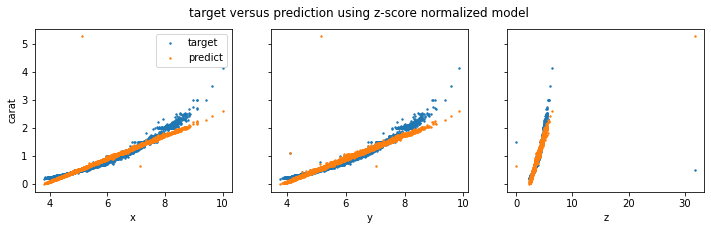

In [20]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i,col in enumerate(X_features):
    ax[i].scatter(xtest[col],ytest, label = 'target', s=2)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(xtest[col],y_pred, label = 'predict', s=2)
ax[0].set_ylabel("carat"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [21]:
X = df['x'].values
x = np.c_[X, X**2]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

-- Epoch 1
Norm: 0.38, NNZs: 2, Bias: 0.796680, T: 45849, Avg. loss: 0.003977
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.44, NNZs: 2, Bias: 0.797556, T: 91698, Avg. loss: 0.002216
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 2, Bias: 0.798181, T: 137547, Avg. loss: 0.001881
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.54, NNZs: 2, Bias: 0.795970, T: 183396, Avg. loss: 0.001658
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 2, Bias: 0.796254, T: 229245, Avg. loss: 0.001496
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.62, NNZs: 2, Bias: 0.796543, T: 275094, Avg. loss: 0.001375
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.65, NNZs: 2, Bias: 0.797372, T: 320943, Avg. loss: 0.001282
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
SGDRegressor(alpha=0.001, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [-0.15963009  0.62943632], 
 b

In [23]:
sgdr.score(xtestsc,ytest)

0.9859242956320872

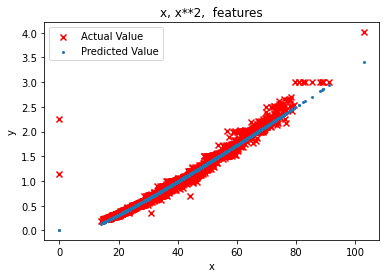

In [24]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Task: 1
1: add another polynomial degree  𝑥^3  and explain which is a better fit with better score

In [25]:
X = df['x'].values
x = np.c_[X, X**2,X**3]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 3) (8091, 3) (45849,) (8091,)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

-- Epoch 1
Norm: 0.33, NNZs: 3, Bias: 0.797386, T: 45849, Avg. loss: 0.002496
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.37, NNZs: 3, Bias: 0.799743, T: 91698, Avg. loss: 0.001006
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 3, Bias: 0.799839, T: 137547, Avg. loss: 0.000928
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.40, NNZs: 3, Bias: 0.797443, T: 183396, Avg. loss: 0.000904
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.41, NNZs: 3, Bias: 0.798314, T: 229245, Avg. loss: 0.000893
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.41, NNZs: 3, Bias: 0.797667, T: 275094, Avg. loss: 0.000888
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 3, Bias: 0.799108, T: 320943, Avg. loss: 0.000886
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
SGDRegressor(alpha=0.001, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [-0.07556478  0.17722449  0.36

In [27]:
sgdr.score(xtestsc,ytest)

0.9935160352349187

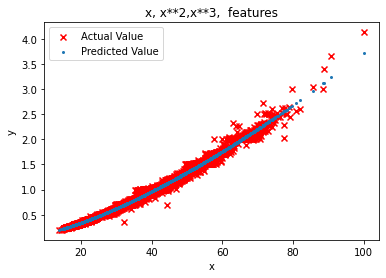

In [29]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,x**3,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Polynomial with degree x^2 we get the better fit with score 0.9859242956320872 while polynomial with degree x^3 we get the better fit with better score 0.9935160352349187 approximately both scores are same but polynomial with degree x^3 give us better fit with better score as compared to the degree x^2 So, polynomial with degree x^3 better than degree x^2 in this case. while in some cases degree x^2 may provide better score then degree with x^3 its depend on the situation and behaviour of the data.

# Task: 2
2: redo this lab for y and z features

In [30]:
# BY just Selecting the important ones
X = df[['y','z']]
X_features = ['y','z']
Xarr = X.values.reshape((-1, 1))
y = df['carat']

In [31]:
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [33]:
sgdr = SGDRegressor(alpha = 0.001, verbose = 0)
sgdr.fit(xtrain, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(alpha=0.001)
number of iterations completed: 9, number of weight updates: 412642.0


In [34]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

model parameters:
 w: [0.20645297 0.32547843], 
 b:[-1.51010877]


In [35]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(xtest)

# make a prediction using w,b. 
y_pred = np.dot(xtest, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on test set:\n{y_pred[:10].round(2)}" )
print(f"Target values \n{ytest[:10].values}")

prediction using np.dot() and sgdr.predict match: True
Prediction on test set:
[1.19 0.24 1.48 1.1  0.28 0.27 0.98 0.76 1.76 1.1 ]
Target values 
[1.1  0.3  1.51 1.02 0.32 0.32 0.9  0.64 2.   1.04]


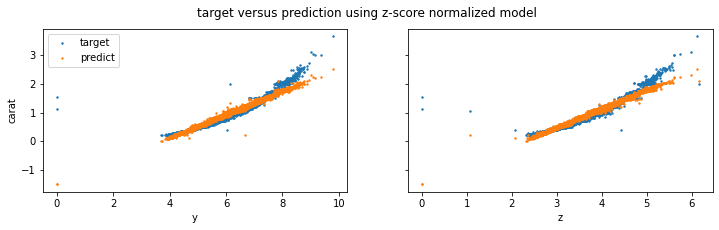

In [37]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
for i,col in enumerate(X_features):
    ax[i].scatter(xtest[col],ytest, label = 'target', s=2)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(xtest[col],y_pred, label = 'predict', s=2)
ax[0].set_ylabel("carat"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [50]:
X = df['x'].values
x = np.c_[X, X**2]


xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

In [52]:
sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")


SGDRegressor(alpha=0.001)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [-0.15251465  0.61980948], 
 b:[0.7978326]


In [53]:
sgdr.score(xtestsc,ytest)

0.9847490233004697

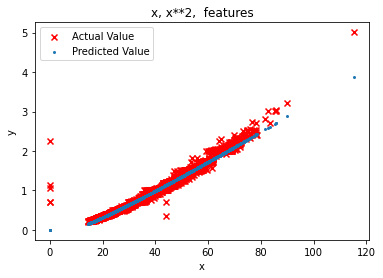

In [54]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Task: 3
3: what happens without feature scaling?

# with scaling

In [55]:
 # with scaling 
X = df['x'].values
x = np.c_[X, X**2]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [56]:
# scaling feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

In [57]:
sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

SGDRegressor(alpha=0.001)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [-0.17054867  0.63377896], 
 b:[0.79833636]


In [58]:
sgdr.score(xtestsc,ytest)

0.9872152004887627

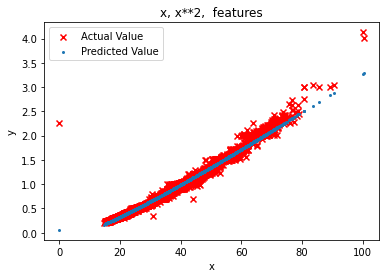

In [59]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


# without scaling

In [60]:
# without scaling 
X = df['x'].values
x = np.c_[X, X**2]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [61]:
sgdr.fit(xtrain, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

SGDRegressor(alpha=0.001)
number of iterations completed: 1000, number of weight updates: 45849001.0
model parameters:
 w: [2801.97646715 -235.81889155], 
 b:[-8199.61322308]


C:\Users\MADINALAPTOPS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [62]:
sgdr.score(xtestsc,ytest)

-328562882.32739127

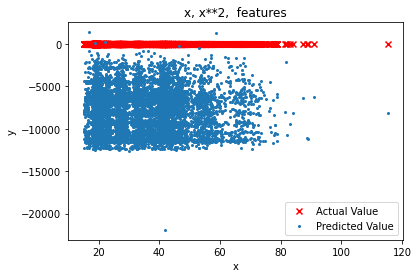

In [63]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

## Without feature scaling, gradient descent will require a lot more steps to reach the minima. In other words, gradient descent will take a lot of time to converge thus increasing the model training time.